Вариационная модель звезды

Как параметр задана масса звезды M.
Звезда разбита на N сферических слоев.
Также задано распределение водорода по слоям.
Имеется N+1 точка - расстояния от центра до i-го слоя.
Неизвестными являются массивы расстояний r[i] и температур t[i]

Date of creation: 2.07.2020

Last updated: 3.07.2020

In [26]:
import math
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [27]:
import physics as ph

In [28]:
from Sun import SSM18 as s

In [29]:
pi = math.pi
# K = 6 # number of interpolated layers
# dimM = 17*K+1 # N+1 - число точек модели (сферических слоев + 1)
# Z = s.Z

In [30]:
# df1 = s.load_interpolated_data(K)
def load_model(epoch):
    filename = 'FromCenter/1epoch%.02d.csv' % epoch
    return pd.read_csv(filename)
epoch = 0
df1 = load_model(epoch)
dimM = len(df1.index)
df1

,Unnamed: 0,Mass,Radius,Temperature,Density,Luminosity,Hydrogen,Opacity,Convection,Pressure,Velocity
0,0,0.000000e+00,0.000000e+00,1.333000e+07,94.554471,0.000000e+00,0.732,1.318613,0.0,1.730205e+17,8.561869e-11
1,1,1.335360e+26,6.960000e+07,1.333000e+07,94.554471,1.634396e+27,0.732,1.318613,1.0,1.730205e+17,8.561869e-11
2,2,1.735967e+26,7.656000e+07,1.332997e+07,94.554040,2.124711e+27,0.732,1.318620,0.0,1.730193e+17,8.561741e-11
3,3,2.220700e+26,8.352000e+07,1.332993e+07,94.553578,2.717979e+27,0.732,1.318627,0.0,1.730180e+17,8.561603e-11
4,4,2.797568e+26,9.048000e+07,1.332990e+07,94.553080,3.424001e+27,0.732,1.318634,0.0,1.730166e+17,8.561455e-11
...,...,...,...,...,...,...,...,...,...,...,...
13995,13995,1.989737e+33,6.262796e+10,5.465099e+03,0.000031,2.461129e+33,0.732,0.003113,0.0,2.349260e+07,4.899800e-49
13996,13996,1.989737e+33,6.262800e+10,5.460450e+03,0.000031,2.461129e+33,0.732,0.003109,0.0,2.344258e+07,4.849587e-49
13997,13997,1.989737e+33,6.262805e+10,5.455801e+03,0.000031,2.461129e+33,0.732,0.003105,0.0,2.339263e+07,4.799847e-49
13998,13998,1.989737e+33,6.262810e+10,5.451153e+03,0.000031,2.461129e+33,0.732,0.003101,0.0,2.334274e+07,4.750576e-49


In [91]:
x = df1['Hydrogen'].values
r = df1['Radius'].values
m = df1['Mass'].values
t = df1['Temperature'].values
# The rest may be computed from the above variables.
d = df1['Density'].values
l = df1['Luminosity'].values
p = df1['Pressure'].values
k = df1['Opacity'].values
c = df1['Convection'].values

In [92]:
t = t*(1. + 0.01*np.cos(r/s.R*ph.pi/2))

In [32]:
d1 = np.zeros(dimM)
l1 = np.zeros(dimM)
p1 = np.zeros(dimM)
k1 = np.zeros(dimM)

In [33]:

# d[0] = 3*m[1]/4/pi/pow(r[1], 3)
# d[1] = 0.5*d[0] + 0.5*(m[2] - m[1])/4/pi/pow((r[1] + r[2])/2, 2)/(r[2] - r[1])
# for i in range(2, dimM-1):
#     d[i] = ((m[i+1] - m[i])/pow(r[i], 2)/(r[i+1] - r[i]) + (m[i] - m[i-1])/pow(r[i], 2)/(r[i] - r[i-1]))/8/pi
# d[dimM-1] = 0.
# for i in range(dimM):
#     p[i] = ph.Pressure(d[i], t[i], x[i], 1 - Z - x[i], Z)
#     k[i] = ph.opacity(d[i], t[i], x[i], 1 - Z - x[i], Z)
# l[0] = 0.
# for i in range(1, dimM):
#     l[i] = l[i-1] + (m[i] - m[i-1])*ph.Etot(d[i], t[i], x[i], 1 - Z - x[i], Z) # /0.5879669006862714

In [34]:
e = np.zeros(dimM) # энерговыделения
a = np.zeros(dimM) # градиент давления
da = np.zeros(dimM) # несоответствие градиента давления
b = np.zeros(dimM) # градиент температуры
db = np.zeros(dimM) # несоответствие градиента температуры 

Уравнение массы

In [37]:
for i in range(1, dimM-1, 70):
    d1[i] = 3/4/pi*(m[i+1] - m[i-1])/(pow(r[i+1], 3) - pow(r[i-1], 3))
    print(i, d[i], d1[i], pow((d1[i] - d[i])/d[i], 2))

1 94.55447133 92.35217738724285 0.0005424833672384153
71 94.424243307852 93.24642913056148 0.00015559173685700028
141 94.08436766953078 93.45781310929694 4.4348899725577234e-05
211 93.5363327905664 93.11146115492683 2.063263994913024e-05
281 92.78333409600175 92.46354549795963 1.1879167365063856e-05
351 91.8296529629725 91.5746585437576 7.710729449942377e-06
421 90.680506322598 90.46967323977614 5.4056714394244745e-06
491 89.34189393662619 89.16324021165687 3.998654142032694e-06
561 87.8204511507608 87.66639627815213 3.077227116074456e-06
631 86.12332387865843 85.98876289464103 2.4411627991177734e-06
701 84.2580837480123 84.1394105953393 1.983726542123654e-06
771 82.2327005442298 82.12726961298064 1.6437924426694486e-06
841 80.0674460132323 79.97324323360408 1.3842530339084234e-06
911 77.79279844336978 77.70823340749875 1.181688163851116e-06
981 75.42078110074982 75.34458936613179 1.0205485507076945e-06
1051 72.95959244251496 72.89075246318808 8.902595964806917e-07
1121 70.416804081912

Условие гидростатики

In [81]:
for i in range(1, dimM-1, 70):
    mu = ph.MU(x[i], 1 - x[i] -Z, Z)
    a[i] = -ph.G*m[i]*d[i]/pow(r[i], 2)
    da[i] = (p[i+1] - p[i])/2/(r[i+1] - r[i]) + (p[i] - p[i-1])/2/(r[i] - r[i-1]) #- a[i]
    print(i, a[i], da[i], pow((a[i] - da[i])/a[i], 2))

1 -173855.2558078713 -86927.62790344827 0.2500000000028033
71 -1362275.2682724872 -1353645.1956988506 4.0132771404998873e-05
141 -2561462.7038193746 -2552976.478986207 1.0976224824467275e-05
211 -3733707.344240869 -3725458.5931195403 4.880854402859265e-06
281 -4866542.301940195 -4858616.941308046 2.6521437575525346e-06
351 -5948334.892971309 -5940813.163259771 1.5989858615357654e-06
421 -6968303.730766615 -6961259.350655172 1.0219541699568821e-06
491 -7916643.159304933 -7910142.466029884 6.742752375659258e-07
561 -8784632.169408007 -8778733.426294252 4.50891246281689e-07
631 -9564719.153322846 -9559472.024747126 3.00953201501557e-07
701 -10250585.691052198 -10246030.846266666 1.974466653304555e-07
771 -10837196.046320314 -10833364.83772184 1.2497919922466813e-07
841 -11322626.232131097 -11319509.652565517 7.576386041119112e-08
911 -11708801.287945177 -11706389.757252872 4.2419028338835354e-08
981 -11996830.985904772 -11995116.067225287 2.0434027842842108e-08
1051 -12188220.765292635 -1

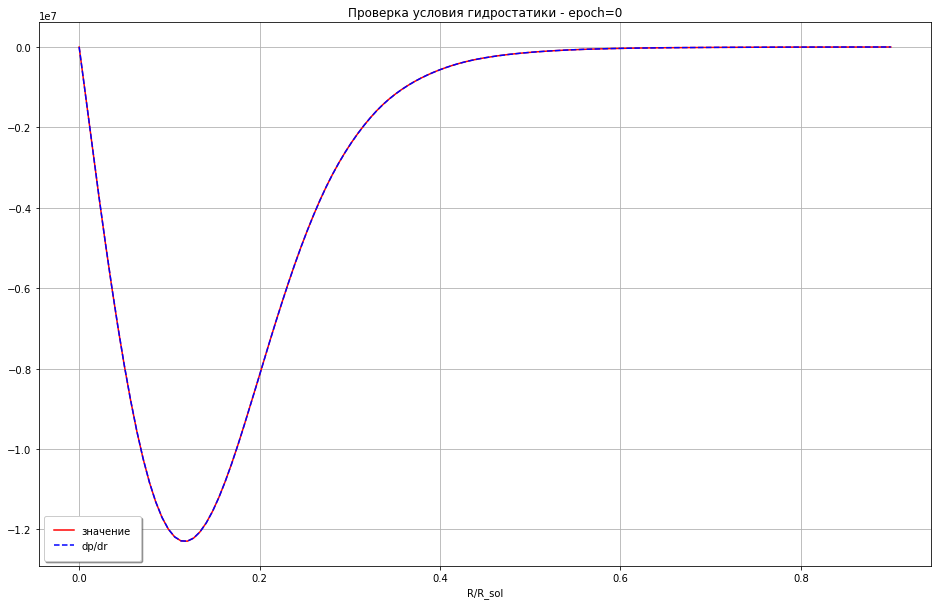

In [82]:
r1 = r[::70]/s.R
a1 = a[::70]
da1 = da[::70]
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, a1, color='red', label='значение')
plt.plot(r1, da1, '--', color='blue', label='dp/dr')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Проверка условия гидростатики - epoch=%d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

Условие переноса энергии

In [93]:
for i in range(1, dimM-1):
    rad = -3/16*k[i]*d[i]*l[i]/ph.sigma/pow(t[i], 3)/4/pi/pow(r[i], 2)
    mu = ph.MU(x[i], 1 - x[i] -Z, Z)
    conv = -0.4*mu/ph.kB*ph.m_prot*ph.G*m[i]/pow(r[i], 2)
    if abs(rad) < abs(conv):
        b[i] = rad
    else:
        b[i] = conv
    db[i] = (t[i+1] - t[i])/2/(r[i+1] - r[i]) + (t[i] - t[i-1])/2/(r[i] - r[i-1]) # - b[i]
    print(i, b[i], db[i], pow((b[i] - db[i])/b[i], 2))

1 -4.5301906458636984e-06 -2.360729524857718e-06 0.22933523517908175
2 -4.867173567482516e-06 -4.894665358775435e-06 3.190453423439689e-05
3 -5.231781232243986e-06 -5.26017681722283e-06 2.945794784085541e-05
4 -5.615870895341715e-06 -5.650197989280581e-06 3.7362837128411295e-05
5 -6.014094732022282e-06 -6.057709700898963e-06 5.259332212414342e-05
6 -6.422822419352932e-06 -6.478040603835179e-06 7.391156829593877e-05
7 -6.839518999484222e-06 -6.907982888080223e-06 0.00010020098811873471
8 -7.262370694276648e-06 -7.345273895135642e-06 0.00013031240853108024
9 -7.690051824646423e-06 -7.788280158533832e-06 0.000163160498048604
10 -8.121575132911093e-06 -8.2357982497384e-06 0.00019780054353633905
11 -8.556193059080054e-06 -8.68692553826961e-06 0.00023345643198285535
12 -8.993331065613666e-06 -9.14097413281514e-06 0.00026951625009124467
13 -9.432541646622637e-06 -9.597412259826415e-06 0.00030551254195157435
14 -9.873471998376426e-06 -1.0055823515479763e-05 0.00034109783591016254
15 -1.0315840

359 -0.00016130567595086583 -0.00016780050868816116 0.0016212001801688026
360 -0.00016171821012579926 -0.00016823027915797658 0.0016215118971224568
361 -0.00016213050229569676 -0.00016865979766636423 0.0016218219529903154
362 -0.00016254255159142786 -0.0001690890633094328 0.001622130361662772
363 -0.00016295435714240765 -0.00016951807517967798 0.001622437135846344
364 -0.00016336591807659357 -0.0001699468323693279 0.0016227422887295836
365 -0.00016377723352048787 -0.0001703753339698078 0.0016230458337128655
366 -0.0001641883025991349 -0.00017080357906919767 0.001623347783159588
367 -0.00016459912443612067 -0.00017123156675544364 0.0016236481499813055
368 -0.00016500969815357288 -0.00017165929611435095 0.0016239469466510024
369 -0.00016542002287215954 -0.0001720867662305205 0.001624244185665554
370 -0.00016583009771108882 -0.00017251397618788411 0.0016245398798058373
371 -0.00016623992178810894 -0.00017294092506702838 0.0016248340408357366
372 -0.000166649494219506 -0.000173367611947737

609 -0.0002544426880528245 -0.0002648360244216579 0.0016685146180296278
610 -0.00025476403480040343 -0.00026517086705840566 0.0016686331689408427
611 -0.0002550848797798016 -0.00026550518741560883 0.0016687514208859385
612 -0.0002554052218137087 -0.0002658389842682304 0.0016688693757902092
613 -0.00025572505972416886 -0.00026617225639043033 0.001668987035526148
614 -0.00025604439233259163 -0.0002665050025573054 0.0016691044024655345
615 -0.0002563632184597585 -0.0002668372215418113 0.0016692214784931232
616 -0.00025668153692583087 -0.00026716891211610094 0.001669338265433038
617 -0.000256999346550358 -0.00026750007305246105 0.0016694547653443692
618 -0.00025731664615228565 -0.00026783070312184015 0.0016695709800494392
619 -0.0002576334345499639 -0.0002681608010955883 0.0016696869116844914
620 -0.0002579497105611564 -0.00026849036574411883 0.0016698025622708264
621 -0.00025826547300304703 -0.0002688193958359717 0.0016699179334168997
622 -0.00025858072069224927 -0.0002691478901411589 0.0

859 -0.0003277071822885848 -0.0003410899240420543 0.001667701330672854
860 -0.0003280394761764436 -0.00034143594316214903 0.001667739967708586
861 -0.0003283712088873814 -0.00034178137807269185 0.001667778498379568
862 -0.00032870237907074224 -0.0003421262273706774 0.001667816923901052
863 -0.00032903298537327217 -0.0003424704896498889 0.001667855245357066
864 -0.000329363026439141 -0.0003428141635017009 0.001667893463894544
865 -0.000329692500909972 -0.00034315724751507947 0.0016679315807154116
866 -0.0003300214074248639 -0.0003434997402757792 0.0016679695968718714
867 -0.00033034974462041813 -0.0003438416403674135 0.0016680075135248982
868 -0.00033067751113076383 -0.00034418294637078616 0.0016680453317720499
869 -0.00033100470558758264 -0.0003445236568646934 0.0016680830528394497
870 -0.0003313313266201351 -0.0003448637704240511 0.0016681206776126504
871 -0.00033165737285528344 -0.00034520328562270483 0.0016681582073245719
872 -0.0003319828429175194 -0.0003455422010318237 0.001668195

1128 -0.00039224672754114415 -0.00040831062961262706 0.0016771945319584455
1129 -0.0003923760635011454 -0.00040844546021617974 0.001677235837892479
1130 -0.00039250445620343983 -0.0004085793095796058 0.001677277252401826
1131 -0.0003926319044349811 -0.00040871217644200715 0.001677318776064419
1132 -0.0003927584069864044 -0.00040884405954690094 0.0016773604095811961
1133 -0.0003928839626520512 -0.000408974957642488 0.0016774021538264266
1134 -0.00039300857022999514 -0.00040910486947870863 0.001677444009228231
1135 -0.0003931322285220638 -0.00040923379381112323 0.0016774859765731436
1136 -0.00039325493633387014 -0.00040936172939957406 0.0016775280567200245
1137 -0.0003933766924748324 -0.0004094886750060444 0.0016775702501498045
1138 -0.00039349749575820324 -0.0004096146293978699 0.001677612557628331
1139 -0.00039361734500109255 -0.00040973959134653446 0.0016776549799504042
1140 -0.00039373623902449545 -0.0004098635596264657 0.0016776975176830918
1141 -0.00039385417665331515 -0.0004099865

1397 -0.0004272312519831498 -0.000444630849725251 0.001658640968905419
1398 -0.0004273274736649242 -0.0004447310313439243 0.00165864881682768
1399 -0.00042742266432643013 -0.0004448301407784202 0.0016586568186540394
1400 -0.00042751682277718104 -0.0004449281767927292 0.0016586649749049864
1401 -0.00042760994783167954 -0.00044502513815565894 0.001658673286031425
1402 -0.0004277020383094356 -0.00044512102364270746 0.0016586817527679172
1403 -0.00042779309303498964 -0.0004452158320336549 0.0016586903756692897
1404 -0.00042788311083792515 -0.00044530956211269717 0.0016586991551337331
1405 -0.00042797209055289476 -0.00044540221267072057 0.0016587080918308073
1406 -0.0004280600310196347 -0.0004454937825034287 0.0016587171863418379
1407 -0.0004281469310829883 -0.00044558427041160994 0.0016587264392062847
1408 -0.00042823278959292253 -0.0004456736752018065 0.0016587358510457726
1409 -0.0004283176054045493 -0.0004457619956855116 0.0016587454224071473
1410 -0.0004284013773781434 -0.0004458492306

1711 -0.0004214030035126155 -0.00043853920301497413 0.0016536125737691763
1712 -0.0004212726342335315 -0.00043840376023703584 0.0016536565754859676
1713 -0.00042114110836406364 -0.00043826711531688364 0.0016537008911887284
1714 -0.00042100842628655494 -0.0004381292686535409 0.0016537455217676747
1715 -0.00042087458839286043 -0.00043799022065646866 0.0016537904682234178
1716 -0.0004207395950843704 -0.0004378499717447618 0.0016538357315071031
1717 -0.00042060344677203085 -0.00043770852234715 0.0016538813125163922
1718 -0.00042046614387636816 -0.0004375658729032014 0.0016539272123232728
1719 -0.0004203276868275081 -0.0004374220238614495 0.001653973431808099
1720 -0.0004201880760651978 -0.00043727697568113284 0.001654019971991559
1721 -0.0004200473120388288 -0.0004371307288312578 0.0016540668338489149
1722 -0.0004199053952074577 -0.00043698328379059915 0.001654114018305778
1723 -0.00041976232603982785 -0.0004368346410482351 0.0016541615263373916
1724 -0.0004196181050143903 -0.0004366848011

1940 -0.00040441748239422056 -0.0004207609542278873 0.0016331602287321242
1941 -0.00040426424779635835 -0.0004206017141073846 0.0016331976262914886
1942 -0.0004041098566666542 -0.0004204412723421762 0.0016332353779412705
1943 -0.0004039543098613868 -0.0004202796298249132 0.0016332734847770806
1944 -0.00040379760824595687 -0.0004201167874576139 0.0016333119478773492
1945 -0.000403639752694916 -0.0004199527461520642 0.0016333507683776018
1946 -0.00040348074409197885 -0.00041978750682914975 0.001633389947334169
1947 -0.0004033205833300459 -0.00041962107041952385 0.0016334294858531939
1948 -0.0004031592713112208 -0.0004194534378629392 0.001633469384953159
1949 -0.00040299680894683056 -0.0004192846101095857 0.0016335096458288457
1950 -0.00040283319715744267 -0.0004191145881186186 0.0016335502695527455
1951 -0.00040266843687288646 -0.00041894337285882744 0.0016335912572047445
1952 -0.0004025025290322684 -0.0004187709653090375 0.0016336326099495061
1953 -0.00040233547458399453 -0.000418597366

2216 -0.00037087718206585017 -0.00038573812381886266 0.0016055817938899325
2217 -0.0003707186087029208 -0.0003855733417377315 0.0016056131976803646
2218 -0.0003705589114941045 -0.0003854073925184664 0.0016056450051425387
2219 -0.0003703980918032016 -0.00038524027758126745 0.001605677217478568
2220 -0.0003702361510019485 -0.0003850719983549655 0.0016057098359812882
2221 -0.0003700730904700334 -0.0003849025562765537 0.001605742861929405
2222 -0.00036990891159511093 -0.00038473195279092024 0.00160577629652635
2223 -0.0003697436157728174 -0.00038456018935131636 0.0016058101409981162
2224 -0.00036957720440678593 -0.0003843872674191558 0.001605844396546427
2225 -0.0003694096789086609 -0.00038421318846481754 0.0016058790645195752
2226 -0.0003692410406981141 -0.0003840379539664417 0.0016059141461478169
2227 -0.00036907129120285675 -0.0003838615654103308 0.001605949642627511
2228 -0.0003689004318586568 -0.00038368402429215403 0.0016059855553787875
2229 -0.0003687284641093534 -0.0003835053321144

2483 -0.0003354707277343846 -0.00034877584551450336 0.0015729980533578886
2484 -0.0003353367418218482 -0.00034863661485429767 0.0015730144395273038
2485 -0.0003352016759183068 -0.0003484962631510062 0.001573031260562233
2486 -0.0003350655316132151 -0.00034835479206006824 0.0015730485178551189
2487 -0.00033492831050221353 -0.00034821220324254305 0.0015730662126168156
2488 -0.0003347900141871399 -0.00034806849836611356 0.0015730843461112416
2489 -0.0003346506442760448 -0.0003479236791052203 0.0015731029196834547
2490 -0.0003345102023832006 -0.0003477777471407263 0.001573121934678151
2491 -0.0003343686901291158 -0.0003476307041597172 0.001573141392388675
2492 -0.0003342261091405461 -0.00034748255185530004 0.0015731612940065177
2493 -0.00033408246105050553 -0.00034733329192774057 0.001573181640888425
2494 -0.0003339377474982808 -0.00034718292608419595 0.0015732024344896347
2495 -0.00033379197012944157 -0.00034703145603737635 0.0015732236760435901
2496 -0.000333645130595852 -0.0003468788835

2779 -0.0003105777254639027 -0.0003226425697757386 0.0015090472350725078
2780 -0.0003105936747795206 -0.00032265881923543847 0.0015089673327875809
2781 -0.000310608558273046 -0.00032267396266052995 0.0015088877381398348
2782 -0.000310622376981985 -0.0003226880011349467 0.0015088084517743234
2783 -0.00031063513194572927 -0.00032270093574476345 0.00150872947438895
2784 -0.00031064682420556207 -0.00032271276757786125 0.001508650806649166
2785 -0.0003106574548046592 -0.00032272349772439606 0.0015085724493049439
2786 -0.00031066702478809555 -0.00032273312727639706 0.0015084944030886295
2787 -0.0003106755352028458 -0.0003227416573269641 0.0015084166685141133
2788 -0.000310682987097791 -0.0003227490889727427 0.0015083392464939884
2789 -0.00031068938152372397 -0.0003227554233113823 0.0015082621377026195
2790 -0.0003106947195333509 -0.00032276066144233857 0.0015081853427763806
2791 -0.0003106990021812983 -0.0003227648044677435 0.001508108862529378
2792 -0.0003107022305241171 -0.0003227678534911

3072 -0.00027469410369041354 -0.00028534288251526313 0.0015027991435563467
3073 -0.0002744529936417607 -0.0002850926216781386 0.0015028545337710745
3074 -0.0002742112462954342 -0.0002848417008650923 0.0015029105958776889
3075 -0.00027396886370008685 -0.00028459012220324626 0.0015029673318111508
3076 -0.00027372584790884936 -0.0002843378878238707 0.0015030247433788202
3077 -0.0002734822009793243 -0.0002840849998631199 0.0015030828324703173
3078 -0.00027323792497357897 -0.0002838314604618314 0.0015031416010029464
3079 -0.0002729930219581369 -0.00028357727176512475 0.0015032010508104442
3080 -0.0002727474940039722 -0.00028332243592313745 0.0015032611838533398
3081 -0.0002725013431865 -0.0002830669550903559 0.001503322002032115
3082 -0.00027225457158556885 -0.0002828108314258159 0.0015033835072461913
3083 -0.0002720071812854529 -0.00028255406709303595 0.001503445701377186
3084 -0.0002717591743748431 -0.0002822966642602181 0.0015035085863487805
3085 -0.0002715105529468379 -0.000282038625100

3337 -0.00023454332158450813 -0.0002433625158990985 0.0014138771654759485
3338 -0.00023467922434064974 -0.00024350287673637625 0.001413668215567503
3339 -0.0002348142354345379 -0.00024364231292977288 0.0014134596962768245
3340 -0.000234948355672699 -0.00024378082532216207 0.0014132516063513707
3341 -0.00023508158586348248 -0.00024391841475768873 0.0014130439443556543
3342 -0.00023521392681702876 -0.00024405508208337465 0.0014128367091956002
3343 -0.0002353453793452396 -0.0002441908281478474 0.0014126298997212273
3344 -0.00023547594426174466 -0.00024432565380073815 0.00141242351454561
3345 -0.00023560562238187076 -0.0002444595598943542 0.0014122175525893626
3346 -0.00023573441452261383 -0.00024459254728240794 0.0014120120126835914
3347 -0.00023586232150260577 -0.0002447246168198829 0.0014118068935385095
3348 -0.0002359893441420863 -0.0002448557693642382 0.0014116021941364902
3349 -0.00023611548326287415 -0.0002449860057744717 0.0014113979134426301
3350 -0.00023624073968833747 -0.0002451

3591 -0.00024273401168483776 -0.00025172918912661586 0.0013732771771198555
3592 -0.0002426713263973992 -0.0002516638212811186 0.0013731673574927082
3593 -0.0002426079735783489 -0.00025159776275268295 0.0013730579693498341
3594 -0.0002425439541627807 -0.0002515310145159193 0.0013729490135591489
3595 -0.0002424792690867114 -0.0002514635775461739 0.0013728404909307073
3596 -0.00024241391928709534 -0.0002513954528195291 0.0013727324022120996
3597 -0.00024234790570183072 -0.00025132664131313754 0.001372624748188555
3598 -0.00024228122926977334 -0.000251257144004888 0.0013725175295764597
3599 -0.00024221389093074608 -0.0002511869618744086 0.0013724107473271296
3600 -0.00024214589162555096 -0.00025111609590192986 0.0013723044022754109
3601 -0.00024207723229597775 -0.00025104454706794977 0.0013721984950343358
3602 -0.00024200791388481635 -0.0002509723163551742 0.0013720930265848947
3603 -0.0002419379373358666 -0.0002508994047466435 0.0013719879976998109
3604 -0.00024186730359395027 -0.00025082

3844 -0.00020832942818724935 -0.00021601796147036206 0.0013620271159131244
3845 -0.00020813181482636783 -0.0002158131551816417 0.0013620626231388596
3846 -0.0002079338254229006 -0.00021560796094347788 0.0013620988982057291
3847 -0.00020773546141210795 -0.00021540238024277516 0.001362135943064012
3848 -0.00020753672423150585 -0.00021519641456911446 0.001362173759799401
3849 -0.00020733761532086133 -0.00021499006541401695 0.0013622123503732751
3850 -0.00020713813612218277 -0.00021478333427127848 0.0013622517167448639
3851 -0.00020693828807971375 -0.0002145762226373712 0.0013622918610167413
3852 -0.0002067380726399262 -0.0002143687320107075 0.001362332785175219
3853 -0.00020653749125151111 -0.0002141608638915731 0.0013623744910693143
3854 -0.00020633654536537149 -0.00021395261978373285 0.0013624169809871324
3855 -0.00020613523643461627 -0.00021374400119255726 0.001362460256989358
3856 -0.00020593356591454913 -0.00021353500962488877 0.0013625043208643497
3857 -0.00020573153526266228 -0.000

4107 -0.00014801811912971478 -0.0001535671733076224 0.0014054265949754287
4108 -0.00014777522726143358 -0.00015331583193653188 0.0014057595949266068
4109 -0.00014753237087266574 -0.00015306452836041159 0.0014060942317311513
4110 -0.00014728955142729382 -0.00015281326409185777 0.0014064305104702056
4111 -0.00014704677038645836 -0.0001525620406412589 0.0014067684365687966
4112 -0.00014680402920853717 -0.00015231085951559128 0.001407108015194265
4113 -0.0001465613293491226 -0.00015205972221915494 0.0014074492516426202
4114 -0.00014631867226100266 -0.0001518086302535737 0.0014077921513495689
4115 -0.0001460760593941384 -0.00015155758511685853 0.0014081367194225083
4116 -0.00014583349219564356 -0.0001513065883048125 0.0014084829613713347
4117 -0.00014559097210976415 -0.00015105564130996033 0.0014088308825709222
4118 -0.0001453485005778569 -0.00015080474562154838 0.00140918048827129
4119 -0.0001451060790383695 -0.00015055390272628055 0.0014095317839876993
4120 -0.0001448637089268194 -0.00015

4392 -0.00016342943690744586 -0.0001691072179741847 0.001206970667704734
4393 -0.00016353118447321228 -0.00016921167323424684 0.0012066192372527657
4394 -0.00016363244249584791 -0.00016931562229466422 0.0012062684417918313
4395 -0.00016373321146812887 -0.0001694190656698721 0.001205918278767139
4396 -0.00016383349188338158 -0.00016952200387457343 0.0012055687455180487
4397 -0.00016393328423546321 -0.00016962443742367183 0.001205219839258602
4398 -0.0001640325890187472 -0.0001697263668333421 0.0012048715575373157
4399 -0.00016413140672810576 -0.00016982779261955842 0.001204523897621037
4400 -0.00016422973785889307 -0.0001699287152990308 0.0012041768568990452
4401 -0.0001643275829069303 -0.00017002913538940605 0.0012038304329738906
4402 -0.00016442494236848878 -0.00017012905340813017 0.0012034846231878448
4403 -0.00016452181674027412 -0.0001702284698732513 0.0012031394249692952
4404 -0.00016461820651941043 -0.00017032738530368746 0.0012027948359520104
4405 -0.0001647141122034258 -0.00017

4629 -0.00017493380155670434 -0.0001808341843533683 0.0011376610987584783
4630 -0.00017493314025488965 -0.00018083287184350808 0.001137418591484511
4631 -0.00017493210080477638 -0.00018083116935827667 0.001137176464801508
4632 -0.00017493068361624064 -0.0001808290773254335 0.001136934718598808
4633 -0.00017492888909865947 -0.00018082659617213575 0.001136693352739518
4634 -0.0001749267176609138 -0.0001808237263252062 0.0011364523671625237
4635 -0.00017492416971139107 -0.00018082046821096581 0.0011362117618168891
4636 -0.00017492124565798912 -0.00018081682225520022 0.0011359715366474096
4637 -0.0001749179459081181 -0.0001808127888828588 0.001135731691477861
4638 -0.0001749142708687041 -0.00018080836851889102 0.0011354922263318184
4639 -0.00017491022094619305 -0.00018080356158740985 0.0011352531411087379
4640 -0.00017490579654655202 -0.00018079836851216037 0.0011350144357639947
4641 -0.00017490099807527474 -0.00018079278971641941 0.0011347761102679578
4642 -0.00017489582593738248 -0.00018

4865 -0.0001651383372240934 -0.00017059368782482062 0.0010913134777128955
4866 -0.0001650592335493514 -0.00017051160527017213 0.0010911671049526834
4867 -0.00016497984386805084 -0.0001704292287573355 0.0010910212004229876
4868 -0.0001649001685982202 -0.00017034655872066022 0.0010908757649419787
4869 -0.00016482020815854334 -0.00017026359559519846 0.0010907307993461418
4870 -0.0001647399629683634 -0.00017018033981623648 0.0010905863043008488
4871 -0.00016465943344768876 -0.00017009679182013095 0.0010904422806330117
4872 -0.00016457862001719722 -0.00017001295204397462 0.0010902987291955232
4873 -0.00016449752309824234 -0.00016992882092539541 0.0010901556507840386
4874 -0.0001644161431128563 -0.00016984439890262344 0.0010900130461625923
4875 -0.0001643344804837571 -0.0001697596864146582 0.0010898709161277274
4876 -0.00016425253563435175 -0.00016967468390130202 0.0010897292615207105
4877 -0.0001641703089887421 -0.00016958939180295948 0.0010895880831444933
4878 -0.00016408780097172914 -0.00

5107 -0.0001387491480947643 -0.00014329170759030664 0.001071866253085438
5108 -0.0001386150974055022 -0.00014315326452237184 0.0010718645318572293
5109 -0.0001384808892872727 -0.00014301466050600613 0.0010718635802197103
5110 -0.00013834652440087667 -0.00014287589622270745 0.001071863399964771
5111 -0.00013821200340810593 -0.00014273697235521156 0.0010718639929989749
5112 -0.00013807732697173984 -0.00014259788958705702 0.0010718653611394358
5113 -0.0001379424957555402 -0.00014245864860258525 0.001071867506115927
5114 -0.0001378075104242493 -0.0001423192500875762 0.0010718704298733842
5115 -0.0001376723716435847 -0.00014217969472857925 0.0010718741342573372
5116 -0.00013753708008023538 -0.0001420399832131138 0.001071878621110767
5117 -0.00013740163640185875 -0.00014190011622963592 0.0010718838922596679
5118 -0.00013726604127707557 -0.00014176009446777263 0.0010718899496271748
5119 -0.00013713029537546647 -0.00014161991861795379 0.0010718967950600156
5120 -0.00013699439936756735 -0.00014

5376 -0.00011656325262276466 -0.00012020844697059754 0.0009779531752452518
5377 -0.00011664535157246293 -0.00012029227981823577 0.0009775062980641454
5378 -0.0001167271486215592 -0.00012037580152428255 0.000977060256273212
5379 -0.00011680864404338595 -0.00012045901237365431 0.0009766150460007465
5380 -0.00011688983811176529 -0.00012054191265170243 0.0009761706633663849
5381 -0.00011697073110099856 -0.00012062450264444731 0.0009757271046118358
5382 -0.00011705132328585547 -0.00012070678263837765 0.0009752843659990833
5383 -0.00011713161494156272 -0.00012078875292011606 0.0009748424436381721
5384 -0.00011721160634379318 -0.00012087041377718827 0.0009744013339034976
5385 -0.00011729129776865614 -0.00012095176549752152 0.0009739610331709289
5386 -0.00011737068949268615 -0.00012103280836894261 0.0009735215375569409
5387 -0.00011744978179283175 -0.00012111354268038238 0.0009730828435657085
5388 -0.00011752857494644713 -0.0001211939687209054 0.0009726449475768661
5389 -0.00011760706923127994

5614 -0.00012820935311036788 -0.00013203264579224403 0.0008892741603884772
5615 -0.00012822740797210653 -0.0001320505630586901 0.0008889597638271814
5616 -0.00012824522453709102 -0.00013206823547143255 0.0008886457655161044
5617 -0.000128262803031007 -0.0001320856632662458 0.0008883321649438018
5618 -0.00012828014367908218 -0.00013210284667823532 0.0008880189615138018
5619 -0.00012829724670608634 -0.00013211978594173713 0.0008877061544979487
5620 -0.00012831411233633203 -0.00013213648129098692 0.0008873937433470184
5621 -0.00012833074079367498 -0.0001321529329596181 0.0008870817274571965
5622 -0.00012834713230151437 -0.00013216914118082936 0.0008867701062477539
5623 -0.0001283632870827938 -0.00013218510618725064 0.0008864588790983998
5624 -0.00012837920536000068 -0.00013220082821101004 0.0008861480453806058
5625 -0.00012839488735516758 -0.00013221630748393463 0.0008858376045500411
5626 -0.00012841033328987272 -0.00013223154423731625 0.000885527556037694
5627 -0.0001284255433852402 -0.0

5879 -0.0001252700480732886 -0.0001288548499589315 0.000818909351450715
5880 -0.00012523169384057192 -0.00012881492316517472 0.0008186922850357308
5881 -0.0001251931494585177 -0.00012877480183666487 0.0008184755963961193
5882 -0.0001251544150907767 -0.0001287344861441779 0.000818259285845404
5883 -0.00012511549090111611 -0.00012869397625859006 0.0008180433536930837
5884 -0.0001250763770534241 -0.00012865327235097842 0.0008178278002884126
5885 -0.00012503707371171188 -0.0001286123745925537 0.0008176126259888276
5886 -0.00012499758104011802 -0.00012857128315476096 0.0008173978312038957
5887 -0.00012495789920291133 -0.00012852999820904513 0.0008171834162868177
5888 -0.0001249180283644934 -0.00012848851992678428 0.0008169693815025919
5889 -0.00012487796868940274 -0.0001284468484797579 0.0008167557272403782
5890 -0.00012483772034231795 -0.00012840498403991285 0.0008165424539048902
5891 -0.00012479728348806042 -0.00012836292677916234 0.0008163295618231982
5892 -0.0001247566582915979 -0.00012

6109 -0.00011621936727528657 -0.00011935544916048604 0.0007281448368275713
6110 -0.00011631461038986285 -0.00011945223868597063 0.0007276699578792719
6111 -0.000116409751772568 -0.00011954892263065317 0.0007271954983020792
6112 -0.00011650479194472602 -0.00011964550152897364 0.0007267214555132418
6113 -0.00011659973142864527 -0.0001197419759162418 0.0007262478268853778
6114 -0.00011669457074761943 -0.00011983834632887136 0.0007257746098543925
6115 -0.0001167893104259282 -0.0001199346133043465 0.0007253018019033532
6116 -0.00011688395098883805 -0.00012003077738102118 0.0007248294004694165
6117 -0.00011697849296260333 -0.00012012683909838677 0.0007243574030666988
6118 -0.00011707293687446717 -0.00012022279899677091 0.0007238858071470417
6119 -0.00011716728325266213 -0.00012031865761757176 0.0007234146102075715
6120 -0.0001172615326264121 -0.0001204144155032245 0.0007229438097742032
6121 -0.00011735568552593264 -0.00012051007319723481 0.0007224734034166866
6122 -0.00011744974248243302 -0.

6281 -0.0001315772931670596 -0.00013493405778195855 0.0006508484596875571
6282 -0.00013166363134669548 -0.00013502148237452713 0.0006504159626648854
6283 -0.0001317499749703452 -0.00013510891099111847 0.0006499835726765931
6284 -0.00013183632479812435 -0.00013519634440726597 0.000649551288355913
6285 -0.00013192268159234604 -0.00013528378340084475 0.0006491191083856829
6286 -0.0001320090461175363 -0.00013537122875190442 0.0006486870314274935
6287 -0.00013209541914044874 -0.00013545868124280276 0.0006482550561675777
6288 -0.0001321818014300807 -0.00013554614165817234 0.0006478231812975408
6289 -0.00013226819375768787 -0.00013563361078488704 0.00064739140549571
6290 -0.00013235459689680046 -0.00013572108941222943 0.0006469597274852008
6291 -0.00013244101162323852 -0.00013580857833155602 0.0006465281458991941
6292 -0.00013252743871512745 -0.00013589607833679927 0.0006460966594679007
6293 -0.00013261387895291548 -0.000135983590224066 0.0006456652668573484
6294 -0.00013270033311938754 -0.00

6564 -0.00015998929777735944 -0.0001636657600351957 0.0005280540275538531
6565 -0.00016012259265786935 -0.0001638005402355305 0.0005276012828432069
6566 -0.00016025631125749952 -0.0001639357496155011 0.0005271482620401258
6567 -0.00016039045657920825 -0.00016407139122164298 0.0005266949632626636
6568 -0.0001605250316474195 -0.0001642074681220686 0.0005262413845746191
6569 -0.0001606600395082325 -0.00016434398340680183 0.0005257875240205839
6570 -0.0001607954832296329 -0.00016448094018811264 0.0005253333796604294
6571 -0.00016093136590170876 -0.00016461834160058395 0.0005248789495258517
6572 -0.00016106769063686528 -0.00016475619080144613 0.0005244242316537144
6573 -0.00016120446057004667 -0.00016489449097064387 0.0005239692240410977
6574 -0.00016134167885895555 -0.00016503324531137156 0.0005235139247342645
6575 -0.00016147934868427952 -0.0001651724570498724 0.0005230583317063328
6576 -0.00016161747324991657 -0.00016531212943577309 0.0005226024428877425
6577 -0.00016175605578320655 -0.0

6856 -0.00016623836309381405 -0.00016742719034088947 5.1141680275860305e-05
6857 -0.00016619345761981316 -0.00016738163590009373 5.1113470763335456e-05
6858 -0.0001661485690821347 -0.0001673360985991961 5.1085260890989886e-05
6859 -0.0001661036974718152 -0.00016729057842909743 5.1057050661429535e-05
6860 -0.00016605884277989772 -0.0001672450753806484 5.102884007238107e-05
6861 -0.0001660140049974318 -0.00016719958944495062 5.100062914259798e-05
6862 -0.0001659691841154734 -0.0001671541206128882 5.097241787156369e-05
6863 -0.00016592438012508513 -0.00016710866887556275 5.094420627690346e-05
6864 -0.00016587959301733588 -0.00016706323422382494 5.091599435410455e-05
6865 -0.00016583482278330127 -0.00016701781664865933 5.088778210959494e-05
6866 -0.00016579006941406317 -0.0001669724161411507 5.085956955788426e-05
6867 -0.00016574533290071 -0.00016692703269223345 5.0831356699972546e-05
6868 -0.00016570061323433667 -0.00016688166629297567 5.080314354780726e-05
6869 -0.0001656559104060446 -0.

7106 -0.00015551706653566254 -0.00015654977435308333 4.409596160129215e-05
7107 -0.00015547613205163857 -0.00015650823925332107 4.406788033774795e-05
7108 -0.0001554352124520849 -0.0001564667192217827 4.40398004909577e-05
7109 -0.00015539430772950474 -0.00015642521425100826 4.401172207762477e-05
7110 -0.00015535341787640647 -0.00015638372433335378 4.3983645098308894e-05
7111 -0.00015531254288530386 -0.00015634224946127573 4.395556956167533e-05
7112 -0.00015527168274871578 -0.00015630078962728067 4.392749548022815e-05
7113 -0.00015523083745916662 -0.00015625934482375815 4.3899422856014046e-05
7114 -0.00015519000700918572 -0.00015621791504314786 4.387135169492889e-05
7115 -0.000155149191391308 -0.00015617650027795635 4.384328200810213e-05
7116 -0.00015510839059807327 -0.0001561351005206903 4.3815213806253246e-05
7117 -0.00015506760462202692 -0.0001560937157637057 4.378714708676007e-05
7118 -0.00015502683345571932 -0.00015605234599959283 4.375908186657013e-05
7119 -0.00015498607709170617 

7437 -0.0001427382240213002 -0.0001435817588339814 3.492411772555281e-05
7438 -0.0001427018364492029 -0.00014354482783466622 3.489692410121244e-05
7439 -0.0001426654615442116 -0.0001435079096649217 3.486973446153705e-05
7440 -0.00014262909930036247 -0.0001434710043187597 3.484254881734331e-05
7441 -0.00014259274971169597 -0.00014343411179009195 3.4815367170797386e-05
7442 -0.00014255641277225638 -0.0001433972320729136 3.478818953065936e-05
7443 -0.00014252008847609227 -0.00014336036516132033 3.476101591365095e-05
7444 -0.00014248377681725608 -0.00014332351104922366 3.473384632092869e-05
7445 -0.00014244747778980438 -0.0001432866697305855 3.470668075748086e-05
7446 -0.0001424111913877977 -0.00014324984119950136 3.4679519239015836e-05
7447 -0.0001423749176053007 -0.00014321302544993307 3.465236176984363e-05
7448 -0.00014233865643638205 -0.0001431762224758424 3.4625208353936576e-05
7449 -0.00014230240787511443 -0.00014313943227132496 3.459805900600123e-05
7450 -0.00014226617191557446 -0.0

7730 -0.00013259496091588222 -0.00013328599302944006 2.7160791480551093e-05
7731 -0.00013256204563263593 -0.0001332525796009242 2.713511705462909e-05
7732 -0.00013252914143059268 -0.00013321917740064947 2.710944904500638e-05
7733 -0.00013249624830485626 -0.00013318578642369824 2.7083787462305413e-05
7734 -0.00013246336625053387 -0.0001331524066650777 2.7058132310972367e-05
7735 -0.00013243049526273577 -0.00013311903811989543 2.7032483603092784e-05
7736 -0.00013239763533657556 -0.00013308568078319204 2.700684134523706e-05
7737 -0.0001323647864671702 -0.00013305233465003326 2.6981205545678413e-05
7738 -0.00013233194864963982 -0.00013301899971553504 2.695557621638389e-05
7739 -0.00013229912187910775 -0.0001329856759746878 2.6929953359218487e-05
7740 -0.0001322663061507007 -0.0001329523634226493 2.6904336988907677e-05
7741 -0.00013223350145954866 -0.0001329190620544936 2.6878727113358597e-05
7742 -0.00013220070780078466 -0.000132885771865253 2.6853123736955054e-05
7743 -0.00013216792516954

8043 -0.00012448109667700214 -0.000125044172800251 2.0461026230353287e-05
8044 -0.00012445994330298634 -0.0001250226971839358 2.0444561486378435e-05
8045 -0.00012443879479243406 -0.00012500122649720732 2.0428100981786682e-05
8046 -0.00012441765114393037 -0.00012497976073866775 2.0411644721883843e-05
8047 -0.0001243965123560609 -0.0001249582999068475 2.0395192706720793e-05
8048 -0.0001243753784274121 -0.00012493684400030104 2.0378744938037255e-05
8049 -0.0001243542493565709 -0.0001249153930176543 2.0362301422725978e-05
8050 -0.0001243331251421251 -0.00012489394695746172 2.034586216242493e-05
8051 -0.00012431200578266296 -0.00012487250581825376 2.0329427156999802e-05
8052 -0.0001242908912767735 -0.0001248510695986684 2.031299641406413e-05
8053 -0.00012426978162304646 -0.000124829638297272 2.0296569935981686e-05
8054 -0.00012424867682007214 -0.00012480821191259496 2.028014772246818e-05
8055 -0.0001242275768664415 -0.00012478679044325143 2.0263729779261116e-05
8056 -0.00012420648176074626 

8303 -0.0001191409962277558 -0.00011962247591752495 1.633177881608284e-05
8304 -0.0001191210615890899 -0.00011960223576942193 1.63165193411445e-05
8305 -0.00011910113146764128 -0.00011958200020119372 1.6301264905373965e-05
8306 -0.00011908120586215943 -0.00011956176921155001 1.6286015510036963e-05
8307 -0.00011906128477139454 -0.00011954154279923632 1.6270771158781494e-05
8308 -0.0001190413681940973 -0.00011952132096301011 1.6255531856031465e-05
8309 -0.00011902145612901903 -0.00011950110370155721 1.6240297601311972e-05
8310 -0.0001190015485749117 -0.00011948089101362311 1.6225068398152452e-05
8311 -0.00011898164553052783 -0.00011946068289800114 1.6209844253277223e-05
8312 -0.0001189617469946206 -0.00011944047935340096 1.619462516770379e-05
8313 -0.00011894185296594372 -0.00011942028037853227 1.617941114241633e-05
8314 -0.00011892196344325159 -0.00011940008597217644 1.6164202183204105e-05
8315 -0.0001189020784252991 -0.00011937989613310289 1.6148998295009282e-05
8316 -0.000118882197910

8604 -0.00011450992167890702 -0.00011491741287150516 1.2663396864620277e-05
8605 -0.00011449669759743573 -0.00011490398559173479 1.2653693066104965e-05
8606 -0.00011448347559165684 -0.00011489056041682915 1.2643992100144762e-05
8607 -0.00011447025566118911 -0.00011487713734642128 1.2634293968953267e-05
8608 -0.00011445703780565145 -0.00011486371638011864 1.2624598673141571e-05
8609 -0.00011444382202466294 -0.00011485029751752865 1.2614906213311141e-05
8610 -0.00011443060831784273 -0.00011483688075827585 1.2605216591120204e-05
8611 -0.00011441739668481012 -0.00011482346610195912 1.2595529806625535e-05
8612 -0.00011440418712518461 -0.00011481005354816885 1.258584585934704e-05
8613 -0.00011439097963858578 -0.00011479664309655515 1.257616475250273e-05
8614 -0.00011437777422463339 -0.00011478323474676813 1.2566486489298215e-05
8615 -0.00011436457088294724 -0.00011476982849835549 1.2556811066586718e-05
8616 -0.00011435136961314738 -0.00011475642435097589 1.254713848808649e-05
8617 -0.0001143

8834 -0.00011152229879901337 -0.00011188381478685719 1.0508278906533199e-05
8835 -0.00011150954236031331 -0.00011187086175632531 1.0499255012332659e-05
8836 -0.00011149678791321424 -0.00011185791074565254 1.0490234197835537e-05
8837 -0.0001114840354573663 -0.00011184496175452308 1.048121646632278e-05
8838 -0.00011147128499241971 -0.0001118320147825444 1.0472201816614096e-05
8839 -0.00011145853651802486 -0.00011181906982939222 1.0463190251480878e-05
8840 -0.00011144579003383226 -0.00011180612689471664 1.0454181772201378e-05
8841 -0.00011143304553949248 -0.0001117931859781251 1.0445176377574913e-05
8842 -0.00011142030303465636 -0.00011178024707930185 1.0436174070840719e-05
8843 -0.00011140756251897487 -0.00011176731019791407 1.0427174854239864e-05
8844 -0.00011139482399209896 -0.00011175437533354361 1.0418178725067173e-05
8845 -0.00011138208745367989 -0.00011174144248586617 1.0409185686041202e-05
8846 -0.00011136935290336895 -0.00011172851165454042 1.0400195738891037e-05
8847 -0.00011135

9016 -0.00010968824757810726 -0.00011001959892517137 9.125512930833192e-06
9017 -0.00010967951805556358 -0.00011001073484206262 9.11955426011301e-06
9018 -0.00010967078948476416 -0.00011000187172430261 9.113597178107555e-06
9019 -0.00010966206186559573 -0.00010999300957172063 9.10764168209293e-06
9020 -0.00010965333519794513 -0.0001099841483841948 9.101687772032214e-06
9021 -0.00010964460948169913 -0.00010997528816165197 9.09573545056992e-06
9022 -0.00010963588471674465 -0.0001099664289039824 9.089784718329816e-06
9023 -0.00010962716090296857 -0.00010995757061102763 9.083835573259447e-06
9024 -0.00010961843804025783 -0.0001099487132826901 9.077888016651579e-06
9025 -0.00010960971612849938 -0.00010993985691888449 9.071942050469886e-06
9026 -0.00010960099516758024 -0.0001099310015194523 9.065997672653935e-06
9027 -0.00010959227515738742 -0.00010992214708428383 9.060054883824232e-06
9028 -0.00010958355609780806 -0.00010991329361328156 9.054113685264903e-06
9029 -0.00010957483798872914 -0.

9230 -0.00010784164143959264 -0.00010814450395934288 7.887113368945478e-06
9231 -0.00010783311306380786 -0.00010813584389736752 7.881502671643945e-06
9232 -0.00010782458561630522 -0.00010812718477695582 7.875893639386172e-06
9233 -0.00010781605909697872 -0.00010811852659799807 7.87028627241377e-06
9234 -0.00010780753350572258 -0.00010810986936044553 7.864680574130065e-06
9235 -0.00010779900884243082 -0.00010810121306412751 7.859076541603024e-06
9236 -0.00010779048510699763 -0.00010809255770894647 7.853474175697609e-06
9237 -0.0001077819622993172 -0.00010808390329482926 7.847873478547744e-06
9238 -0.00010777344041928379 -0.00010807524982166619 7.842274450381648e-06
9239 -0.0001077649194667916 -0.00010806659728931092 7.836677089528021e-06
9240 -0.00010775639944173502 -0.00010805794569767815 7.831081397475545e-06
9241 -0.00010774788034400831 -0.00010804929504668252 7.825487375718017e-06
9242 -0.00010773936217350587 -0.00010804064533615336 7.819895021312256e-06
9243 -0.00010773084493012214

9479 -0.00010602589338475982 -0.00010629944344933047 6.656558638909792e-06
9480 -0.00010602006172377411 -0.0001062935216885607 6.652906219730236e-06
9481 -0.00010601423050690099 -0.00010628760037829964 6.649254656636136e-06
9482 -0.00010600839973410686 -0.00010628167951848638 6.645603948445063e-06
9483 -0.00010600256940535805 -0.00010627575910909475 6.641954095669369e-06
9484 -0.00010599673952062091 -0.00010626983915010735 6.638305099245351e-06
9485 -0.00010599091007986183 -0.00010626391964147194 6.63465695841441e-06
9486 -0.00010598508108304719 -0.0001062580005831798 6.631009674534018e-06
9487 -0.00010597925253014341 -0.00010625208197517869 6.627363246843088e-06
9488 -0.00010597342442111686 -0.00010624616381742509 6.6237176750085445e-06
9489 -0.00010596759675593394 -0.00010624024610985801 6.620072957846755e-06
9490 -0.0001059617695345611 -0.00010623432885250358 6.616429098404069e-06
9491 -0.00010595594275696478 -0.00010622841204532696 6.612786096764012e-06
9492 -0.00010595011642311133

9729 -0.00010458171605887832 -0.00010483293879131431 5.7704056213263955e-06
9730 -0.00010457599440313065 -0.00010482712861883535 5.7669710099006825e-06
9731 -0.00010457027318338256 -0.0001048213188886622 5.763537286747973e-06
9732 -0.00010456455239960289 -0.00010481550960074256 5.760104451042616e-06
9733 -0.00010455883205176046 -0.00010480970075503293 5.756672502364177e-06
9734 -0.00010455311213982407 -0.00010480389235150717 5.753241441089925e-06
9735 -0.00010454739266376256 -0.00010479808439012176 5.749811266797415e-06
9736 -0.00010454167362354486 -0.00010479227687086796 5.746381980657689e-06
9737 -0.00010453595501913985 -0.00010478646979371966 5.74295358304417e-06
9738 -0.00010453023685051631 -0.00010478066315863332 5.739526073537382e-06
9739 -0.0001045245191176432 -0.00010477485696557413 5.7360994521083806e-06
9740 -0.0001045188018204894 -0.00010476905121449852 5.732673718332865e-06
9741 -0.00010451308495902383 -0.0001047632459054065 5.729248873780342e-06
9742 -0.0001045073685332154

10005 -0.00010332046136563201 -0.0001035513151823824 4.992308845875372e-06
10006 -0.00010331652348569644 -0.00010354731635615205 4.990053583590979e-06
10007 -0.0001033125858161492 -0.00010354331774335499 4.987798770293181e-06
10008 -0.00010330864835698048 -0.00010353931934497924 4.985544449163556e-06
10009 -0.00010330471110818056 -0.0001035353211593366 4.983290547686073e-06
10010 -0.00010330077406973946 -0.00010353132318641456 4.9810370658160725e-06
10011 -0.0001032968372416475 -0.00010352732542822653 4.978784091021477e-06
10012 -0.00010329290062389488 -0.00010352332788270943 4.97653153462877e-06
10013 -0.00010328896421647171 -0.0001035193305498882 4.9742793982077424e-06
10014 -0.00010328502801936824 -0.00010351533343112563 4.972027741088277e-06
10015 -0.00010328109203257461 -0.00010351133652569681 4.969776532432326e-06
10016 -0.00010327715625608117 -0.00010350733983358926 4.9675257721675204e-06
10017 -0.00010327322068987802 -0.00010350334335545319 4.965275488830035e-06
10018 -0.000103

10229 -0.00010244361310232169 -0.00010266089054730796 4.498414980464131e-06
10230 -0.00010243972211015634 -0.0001026569392860636 4.496261304151488e-06
10231 -0.0001024358313262623 -0.00010265298823543701 4.494108058804448e-06
10232 -0.00010243194075063041 -0.00010264903739540962 4.491955244098386e-06
10233 -0.00010242805038325172 -0.0001026450867672893 4.489802914581463e-06
10234 -0.00010242416022411716 -0.00010264113635110713 4.487651071946605e-06
10235 -0.0001024202702732177 -0.00010263718614550552 4.485499660451727e-06
10236 -0.00010241638053054423 -0.00010263323615045343 4.483348679256978e-06
10237 -0.00010241249099608774 -0.00010262928636794037 4.4811982110460345e-06
10238 -0.00010240860166983929 -0.00010262533679597068 4.47904817372002e-06
10239 -0.00010240471255178966 -0.00010262138743454432 4.4768985677235e-06
10240 -0.00010240082364192999 -0.00010261743828563199 4.474749474907884e-06
10241 -0.00010239693494025118 -0.0001026134893472755 4.472600814778046e-06
10242 -0.0001023930

10477 -0.00010171806924413185 -0.00010192352559753791 4.079838155285273e-06
10478 -0.00010171537274169683 -0.00010192078731991564 4.078395457189932e-06
10479 -0.00010171267634052065 -0.00010191804914546933 4.076953005743777e-06
10480 -0.00010170998004060062 -0.00010191531107423454 4.0755108024739134e-06
10481 -0.00010170728384193386 -0.00010191257310521724 4.074068808047716e-06
10482 -0.00010170458774451748 -0.00010190983523894551 4.072627043563432e-06
10483 -0.00010170189174834871 -0.00010190709747539273 4.071185508089444e-06
10484 -0.00010169919585342461 -0.00010190435981495365 4.069744217420046e-06
10485 -0.00010169650005974254 -0.00010190162225676765 4.068303137531246e-06
10486 -0.00010169380436729943 -0.00010189888480130058 4.066862287044905e-06
10487 -0.00010169110877609258 -0.00010189614744801556 4.065421644794477e-06
10488 -0.0001016884132861191 -0.00010189341019744948 4.063981232207172e-06
10489 -0.00010168571789737619 -0.00010189067305055172 4.062541087047895e-06
10490 -0.000

10729 -0.00010105136244230865 -0.00010124608525763912 3.7132084780169355e-06
10730 -0.00010104949242796256 -0.00010124418626502414 3.7122407684781813e-06
10731 -0.0001010476224629073 -0.00010124228732172387 3.711273146534031e-06
10732 -0.00010104575254714197 -0.00010124038842637808 3.710305560374051e-06
10733 -0.00010104388268066572 -0.00010123848958310566 3.7093381670794583e-06
10734 -0.00010104201286347768 -0.00010123659079181765 3.7083709632715505e-06
10735 -0.00010104014309557709 -0.00010123469204849689 3.707403795854755e-06
10736 -0.00010103827337696292 -0.00010123279335451629 3.7064367172190926e-06
10737 -0.00010103640370763442 -0.00010123089471252 3.705469828161012e-06
10738 -0.00010103453408759072 -0.0001012289961178936 3.7045029528838077e-06
10739 -0.00010103266451683082 -0.00010122709757253123 3.703536163623663e-06
10740 -0.00010103079499535397 -0.00010122519908050049 3.702569615365399e-06
10741 -0.00010102892552315933 -0.00010122330063787343 3.701603158499006e-06
10742 -0.00

10989 -0.00010056681589452749 -0.0001007540280292555 3.4654416529342445e-06
10990 -0.00010056495866771187 -0.00010075214200817804 3.4645036876162567e-06
10991 -0.00010056310148997484 -0.00010075025603615198 3.4635658102263853e-06
10992 -0.0001005612443613155 -0.00010074837011460722 3.462628073731408e-06
10993 -0.00010055938728173317 -0.00010074648424217739 3.461690427591606e-06
10994 -0.00010055753025122706 -0.00010074459841752153 3.4607528222351217e-06
10995 -0.00010055567326979636 -0.00010074271264534572 3.459815431827683e-06
10996 -0.00010055381633744042 -0.0001007408269242582 3.458878204880831e-06
10997 -0.00010055195945415842 -0.00010073894125091926 3.4579410178882013e-06
10998 -0.00010055010261994962 -0.00010073705562673343 3.4570039228519887e-06
10999 -0.0001005482458348132 -0.00010073517005232033 3.4560669427295257e-06
11000 -0.00010054638909874844 -0.00010073328452833771 3.4551301018714465e-06
11001 -0.00010054453241175461 -0.00010073139905347013 3.454193351671289e-06
11002 -0

11229 -0.00010016402334195097 -0.00010034471170673605 3.25414464842315e-06
11230 -0.0001001627307383073 -0.00010034339905892605 3.2535066809280414e-06
11231 -0.00010016143815863727 -0.00010034208643356217 3.2528687029431915e-06
11232 -0.00010016014560294053 -0.00010034077383439696 3.2522308496304047e-06
11233 -0.00010015885307121698 -0.00010033946126047639 3.251593086626276e-06
11234 -0.00010015756056346633 -0.00010033814870901109 3.2509553135053236e-06
11235 -0.00010015626807968837 -0.00010033683618375339 3.2503176653825324e-06
11236 -0.00010015497561988295 -0.00010033552368281359 3.2496800742215977e-06
11237 -0.00010015368318404977 -0.00010033421120429282 3.2490424716864674e-06
11238 -0.00010015239077218861 -0.00010033289875007179 3.2484049254940392e-06
11239 -0.00010015109838429925 -0.00010033158632112254 3.2477674706372204e-06
11240 -0.00010014980602038151 -0.00010033027391840801 3.2471301417677928e-06
11241 -0.00010014851368043516 -0.00010032896153808542 3.246492800604108e-06
1124

11482 -9.983775828333434e-05 -0.00010001338643379296 3.0945579054782137e-06
11483 -9.983647173834408e-05 -0.00010001207993347614 3.0939344605920263e-06
11484 -9.983518521727634e-05 -0.00010001077345551196 3.093311005651721e-06
11485 -9.983389872013089e-05 -0.00010000946699990955 3.092687541007855e-06
11486 -9.983261224690757e-05 -0.00010000816057048134 3.09206420098731e-06
11487 -9.983132579760627e-05 -0.00010000685416720014 3.0914409846199643e-06
11488 -9.983003937222672e-05 -0.00010000554778632605 3.090817760177017e-06
11489 -9.982875297076879e-05 -0.00010000424142873743 3.0901945586154533e-06
11490 -9.982746659323228e-05 -0.00010000293509730479 3.08957148103864e-06
11491 -9.982618023961703e-05 -0.00010000162878826125 3.0889483947975215e-06
11492 -9.982489390992281e-05 -0.00010000032250345397 3.0883253649558714e-06
11493 -9.982360760414953e-05 -9.999901624482076e-05 3.0877024597408263e-06
11494 -9.982232132229693e-05 -9.999771001046909e-05 3.0870796125239066e-06
11495 -9.982103506436

11717 -9.95852832977692e-05 -9.975680184681655e-05 2.966414681666246e-06
11718 -9.958438600377132e-05 -9.975589063238036e-05 2.9659866416821247e-06
11719 -9.958348872148028e-05 -9.975497943116393e-05 2.965558676498118e-06
11720 -9.958259145089622e-05 -9.975406824179944e-05 2.9651307387961433e-06
11721 -9.958169419201895e-05 -9.975315706028706e-05 2.964702690264965e-06
11722 -9.958079694484848e-05 -9.97522458947171e-05 2.9642748106864787e-06
11723 -9.95798997093848e-05 -9.975133474101205e-05 2.963846959048443e-06
11724 -9.957900248562776e-05 -9.975042359781702e-05 2.963419088510481e-06
11725 -9.957810527357745e-05 -9.974951246514505e-05 2.9629911995301014e-06
11726 -9.957720807323368e-05 -9.974860134436388e-05 2.9625633394073906e-06
11727 -9.957631088459648e-05 -9.974769023681541e-05 2.9621355545281598e-06
11728 -9.957541370766582e-05 -9.974677914246068e-05 2.961707843538746e-06
11729 -9.957451654244164e-05 -9.974586805995789e-05 2.961280160055484e-06
11730 -9.957361938892386e-05 -9.974

11898 -9.94229057327022e-05 -9.959206542505069e-05 2.8948153703535294e-06
11899 -9.942173170450037e-05 -9.959115635917152e-05 2.9039596097874175e-06
11900 -9.942055716822491e-05 -9.95902473065293e-05 2.9131364143226233e-06
11901 -9.941938212249175e-05 -9.958933826573903e-05 2.922345870601324e-06
11902 -9.941820656591143e-05 -9.958842923544803e-05 2.931588066741987e-06
11903 -9.941703049709022e-05 -9.958752021570819e-05 2.9408631396506665e-06
11904 -9.941585391462909e-05 -9.958661120780735e-05 2.9501712696173875e-06
11905 -9.941467681712388e-05 -9.958570221310462e-05 2.959512640346492e-06
11906 -9.941349920316579e-05 -9.958479323031856e-05 2.9688873449596853e-06
11907 -9.941232107134088e-05 -9.958388426207018e-05 2.978295612457081e-06
11908 -9.941114242022991e-05 -9.958297530163547e-05 2.987737348126611e-06
11909 -9.94099632484088e-05 -9.958206635579015e-05 2.997212926632596e-06
11910 -9.940878355444836e-05 -9.95811574204443e-05 3.0067223457626304e-06
11911 -9.940760333691415e-05 -9.958

12106 -9.920520910056328e-05 -9.942595116256973e-05 4.951094737703871e-06
12107 -9.920439056539969e-05 -9.94253163365391e-05 4.959420948738308e-06
12108 -9.920357173330246e-05 -9.942468151051282e-05 4.967767665117854e-06
12109 -9.920275260359822e-05 -9.942404669604726e-05 4.976135471390615e-06
12110 -9.920193317561164e-05 -9.942341188933967e-05 4.984524262789953e-06
12111 -9.92011134486655e-05 -9.942277708079993e-05 4.992933673498035e-06
12112 -9.920029342208058e-05 -9.942214227995336e-05 5.001364198355716e-06
12113 -9.919947309517526e-05 -9.942150748679999e-05 5.00981590409717e-06
12114 -9.91986524672661e-05 -9.942087270527188e-05 5.018289035295365e-06
12115 -9.919783153766784e-05 -9.942023792186562e-05 5.026783049233295e-06
12116 -9.919701030569288e-05 -9.941960314234055e-05 5.0352982728723935e-06
12117 -9.91961887706518e-05 -9.941896837438528e-05 5.043835121672231e-06
12118 -9.919536693185277e-05 -9.941833360649021e-05 5.052393142503442e-06
12119 -9.919454478860253e-05 -9.9417698852

12351 -9.899380573579336e-05 -9.927059202280718e-05 7.81759375356552e-06
12352 -9.899288810168439e-05 -9.926995861484771e-05 7.833802681722824e-06
12353 -9.899196992147114e-05 -9.926932522038461e-05 7.85006046080798e-06
12354 -9.899105119365317e-05 -9.926869182982421e-05 7.866366733275635e-06
12355 -9.899013191672417e-05 -9.926805844313871e-05 7.882721682821933e-06
12356 -9.898921208917242e-05 -9.926742506035598e-05 7.89912549716008e-06
12357 -9.898829170948092e-05 -9.92667916833743e-05 7.915578471197145e-06
12358 -9.898737077612677e-05 -9.926615831413832e-05 7.932080903831385e-06
12359 -9.898644928758194e-05 -9.92655249526387e-05 7.948632983979696e-06
12360 -9.898552724231256e-05 -9.926489159884768e-05 7.965234900416166e-06
12361 -9.898460463877904e-05 -9.926425824318132e-05 7.981886297301404e-06
12362 -9.898368147543645e-05 -9.926362489526055e-05 7.99858791482517e-06
12363 -9.898275775073416e-05 -9.926299155507619e-05 8.01533994551243e-06
12364 -9.898183346311579e-05 -9.9262358222637

12574 -9.882143110455904e-05 -9.915234267728184e-05 1.1212995129214546e-05
12575 -9.882078744748365e-05 -9.915190004296565e-05 1.1226768895148886e-05
12576 -9.882014346371728e-05 -9.915145742521979e-05 1.1240574661300348e-05
12577 -9.881949915250496e-05 -9.915101481303756e-05 1.1254411775773717e-05
12578 -9.881885451308958e-05 -9.915057219546521e-05 1.1268279588758876e-05
12579 -9.881820954471143e-05 -9.915012958077428e-05 1.1282178755925716e-05
12580 -9.881756424660898e-05 -9.914968697716996e-05 1.1296109930161814e-05
12581 -9.881691861801795e-05 -9.914924437089755e-05 1.1310072271406496e-05
12582 -9.881627265817171e-05 -9.914880176200993e-05 1.1324065878044333e-05
12583 -9.881562636630165e-05 -9.914835916415601e-05 1.1338091775392826e-05
12584 -9.881497974163612e-05 -9.914791656640875e-05 1.1352149315574835e-05
12585 -9.881433278340181e-05 -9.914747396883429e-05 1.1366238599307906e-05
12586 -9.881368549082285e-05 -9.91470313767969e-05 1.1380360089454566e-05
12587 -9.881303786312057e-

12890 -9.859883718934749e-05 -9.901347772854293e-05 1.7684791127889743e-05
12891 -9.85983561262754e-05 -9.901316851810298e-05 1.769962621604318e-05
12892 -9.859787480796899e-05 -9.901285932083195e-05 1.7714490675155865e-05
12893 -9.859739323388674e-05 -9.901255010531677e-05 1.77293818982695e-05
12894 -9.859691140348587e-05 -9.90122408951479e-05 1.774430197396819e-05
12895 -9.859642931622232e-05 -9.901193169028759e-05 1.775925097468471e-05
12896 -9.859594697155002e-05 -9.901162249072629e-05 1.7774228975551284e-05
12897 -9.859546436892176e-05 -9.901131329653012e-05 1.7789236058397268e-05
12898 -9.859498150778867e-05 -9.901100408802968e-05 1.7804270616110925e-05
12899 -9.859449838760007e-05 -9.901069488480939e-05 1.781933440026279e-05
12900 -9.859401500780407e-05 -9.901038569476716e-05 1.7834428164382772e-05
12901 -9.859353136784699e-05 -9.901007649434142e-05 1.7849549967276426e-05
12902 -9.859304746717365e-05 -9.900976729534126e-05 1.7864700897207884e-05
12903 -9.859256330522765e-05 -9.9

13103 -9.848959964079748e-05 -9.894764744148963e-05 2.1629220114515833e-05
13104 -9.848904903019594e-05 -9.894733852064028e-05 2.1652293626427482e-05
13105 -9.84884980037734e-05 -9.894702960510632e-05 2.1675419695501624e-05
13106 -9.84879465604948e-05 -9.894672070272396e-05 2.169859922677532e-05
13107 -9.848739469932121e-05 -9.894641178998456e-05 2.1721830160949956e-05
13108 -9.84868424192109e-05 -9.894610287472432e-05 2.1745113402751724e-05
13109 -9.848628971911829e-05 -9.894579398045172e-05 2.176845134411477e-05
13110 -9.84857365979945e-05 -9.894548507584108e-05 2.1791841184228774e-05
13111 -9.848518305478676e-05 -9.89451761608263e-05 2.1815283081535183e-05
13112 -9.848462908843929e-05 -9.89448672668179e-05 2.1838780182267216e-05
13113 -9.848407469789272e-05 -9.894455837031703e-05 2.1862330425980985e-05
13114 -9.848351988208394e-05 -9.89442494634405e-05 2.1885933231640584e-05
13115 -9.848296463994642e-05 -9.89439405697152e-05 2.1909591003005506e-05
13116 -9.848240897041006e-05 -9.894

13352 -9.834757886155588e-05 -9.887433588929342e-05 2.8687541506350395e-05
13353 -9.834717951040356e-05 -9.887411987107101e-05 2.8707746991774305e-05
13354 -9.834677988487384e-05 -9.887390387592265e-05 2.872799233672974e-05
13355 -9.834637998437256e-05 -9.887368787024884e-05 2.874827397792339e-05
13356 -9.834597980830346e-05 -9.887347186526282e-05 2.8768593235238202e-05
13357 -9.834557935606927e-05 -9.887325586097816e-05 2.8788950208491913e-05
13358 -9.83451786270702e-05 -9.887303985738128e-05 2.880934499496788e-05
13359 -9.83447776207056e-05 -9.887282386565853e-05 2.8829778915146773e-05
13360 -9.83443763363724e-05 -9.88726078522107e-05 2.885024839960306e-05
13361 -9.834397477346586e-05 -9.887239183945074e-05 2.8870755994559603e-05
13362 -9.834357293137966e-05 -9.887217584977792e-05 2.8891304248584265e-05
13363 -9.834317080950589e-05 -9.887195986079292e-05 2.8911890815306636e-05
13364 -9.83427684072346e-05 -9.887174385011003e-05 2.8932513346696105e-05
13365 -9.834236572395413e-05 -9.88

13644 -9.821622903315873e-05 -9.881129094876332e-05 3.670775300620381e-05
13645 -9.821571484457502e-05 -9.88110751306147e-05 3.6744958296781025e-05
13646 -9.821520009879534e-05 -9.881085932428592e-05 3.678225351378612e-05
13647 -9.821468479429303e-05 -9.881064351865851e-05 3.6819637583048336e-05
13648 -9.821416892953604e-05 -9.881042771373914e-05 3.6857110804221304e-05
13649 -9.821365250298672e-05 -9.881021190947392e-05 3.689467347077198e-05
13650 -9.821313551310172e-05 -9.880999609473089e-05 3.6932324506491256e-05
13651 -9.821261795833198e-05 -9.880978030301369e-05 3.697006836038887e-05
13652 -9.821209983712296e-05 -9.880956450640153e-05 3.700790188188476e-05
13653 -9.821158114791424e-05 -9.880934869931833e-05 3.7045824684164255e-05
13654 -9.82110618891398e-05 -9.880913289848553e-05 3.708383914544225e-05
13655 -9.82105420592277e-05 -9.880891710394358e-05 3.712194557987598e-05
13656 -9.82100216566005e-05 -9.880870129889025e-05 3.7160142212101446e-05
13657 -9.820950067967443e-05 -9.8808

13944 -9.806083626787912e-05 -9.867878388810374e-05 3.971112063716084e-05
13945 -9.806011705591031e-05 -9.867805648652831e-05 3.971065056906578e-05
13946 -9.805939483402179e-05 -9.867732604103247e-05 3.971017856467489e-05
13947 -9.8058669584722e-05 -9.867659258191015e-05 3.9709710779798756e-05
13948 -9.805794129040463e-05 -9.867585606754147e-05 3.9709244142287776e-05
13949 -9.805720993334785e-05 -9.867511645622961e-05 3.970877558503324e-05
13950 -9.805647549571368e-05 -9.867437377796877e-05 3.9708311270149657e-05
13951 -9.805573795954725e-05 -9.867362799080244e-05 3.97078481272974e-05
13952 -9.805499730677522e-05 -9.867287905269718e-05 3.970738309154432e-05
13953 -9.805425351920585e-05 -9.867212699319331e-05 3.970692231245814e-05
13954 -9.805350657852716e-05 -9.867137177007477e-05 3.970646273250794e-05
13955 -9.805275646630736e-05 -9.867061334092333e-05 3.9706001283650583e-05
13956 -9.805200316399232e-05 -9.86698517349025e-05 3.9705544113930493e-05
13957 -9.805124665290604e-05 -9.86690

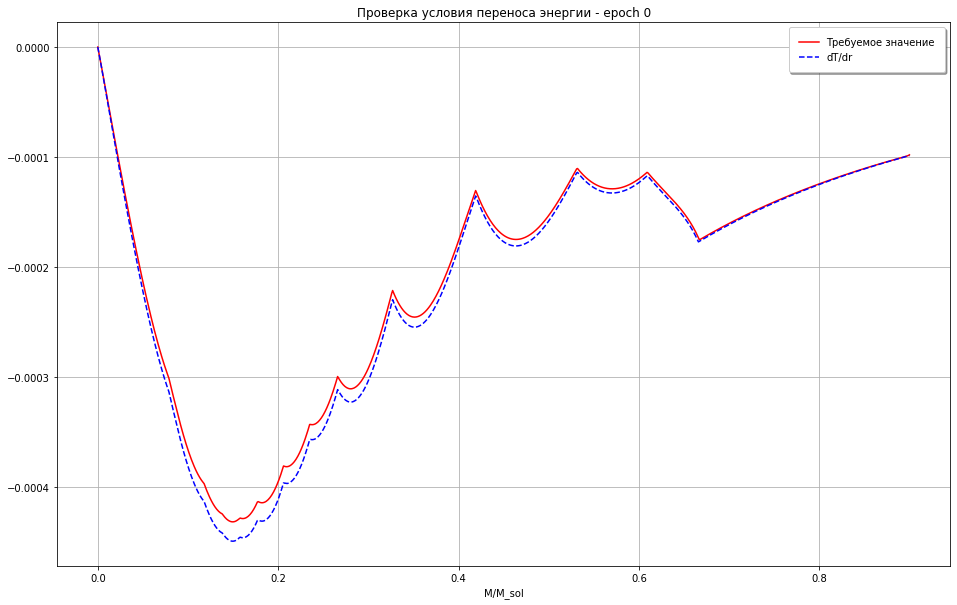

In [94]:

r1 = r[::10]/s.R
b1 = b[::10]
db1 = db[::10]
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, b1, color='red', label='Требуемое значение')
plt.plot(r1, db1, '--', color='blue', label='dT/dr')
# plt.xlim(0,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('M/M_sol')
plt.ylabel('')
plt.title('Проверка условия переноса энергии - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

In [95]:
sa = 0
sb = 0
for i in range(1, dimM-1):
    sa += pow((da[i] - a[i])/a[i], 2)
    sb += pow((db[i] - b[i])/b[i], 2)
sa, sb    

(0.277172384250271, 9.105137814977317)

In [15]:
dimM

1021

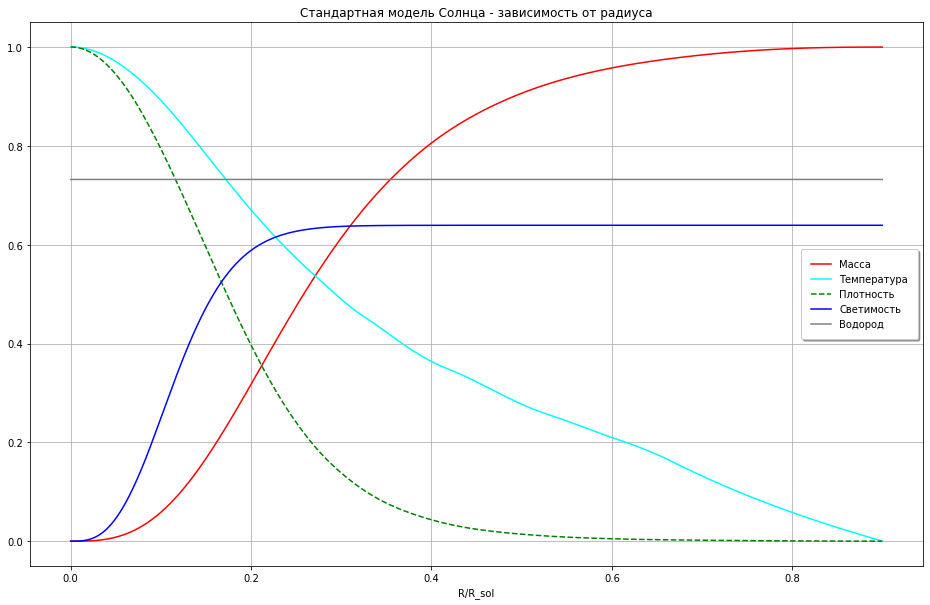

In [55]:
r1 = r/s.R
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, m/s.M, color='red', label='Масса')
plt.plot(r1, t/t[0], color='cyan', label='Температура')
# plt.plot(r1[1:], d1[1:]/d[0], color='green', label='Плотность')
plt.plot(r1, d/d[0], '--', color='green', label='Плотность')
plt.plot(r1, l/s.L, color='blue', label='Светимость')
plt.plot(r1, x, color='gray', label='Водород')
# plt.plot(r1, p1/p1[0], color='black', marker='.', label='Давление')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Стандартная модель Солнца - зависимость от радиуса')
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

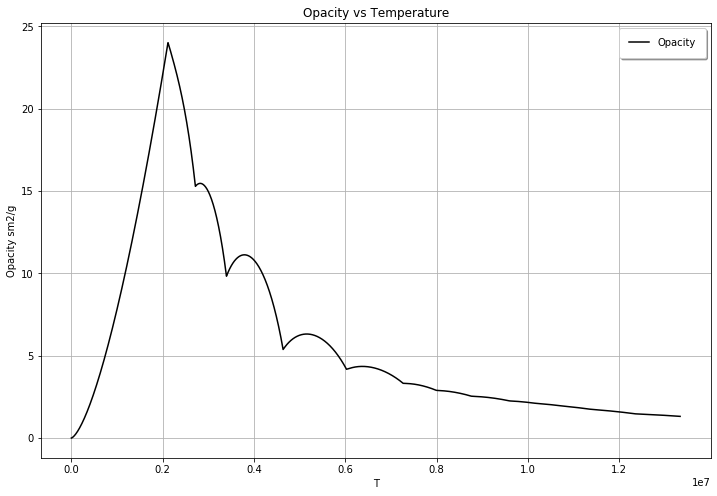

In [56]:
plt.figure(figsize=(12, 8))
ax = plt.axes()
plt.plot(t, k, color='black', label='Opacity')
# plt.plot(r1, myk, color='red', marker='.', label='Непроз my')
#plt.xlim(6, 7.25)
#plt.ylim(0, 20)
plt.xlabel('T')
plt.ylabel('Opacity sm2/g')
plt.title('Opacity vs Temperature')
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

In [35]:
for i in range(2*K):
    print(i, d[i])

0 156.3
1 155.67777777777778
2 153.81111111111113
3 150.70000000000002
4 146.34444444444446
5 140.74444444444444
6 133.9
7 129.46789027833805
8 125.08862444534086
9 120.76220250100846
10 116.48862444534085
11 112.26789027833803
